In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# New York City
New York City is the most populous city in the United States, with over eight million inhabitants, and it is the center of the largest metropolitan area in the world by urban landmass, the New York metropolitan area. Considered the cultural, financial, and media capital of the world, New York is the home of the United Nations Headquarters. The city is composed of five boroughs: Brooklyn, Queens, Manhattan, the Bronx, and Staten Island.

# Exploring the Dataset
Before we perform any analysis, we'll first see what our dataset looks like. These are the variables it contains:

* id - id number that identifies the property
* name - Property name
* host_id - id number that identifies the host
* host_name - Host name
* neighbourhood_group - The main regions of the city
* neighbourhood - The neighbourhoods
* latitude - Property latitude
* longitude - Property longitude
* room_type - Type of the room
* price - The price for one night
* minimum_nights - Minimum amount of nights to book the place
* number_of_reviews - Number of reviews received
* last_review - Date of the last review
* reviews_per_month - Amount of reviews per month
* calculated_host_listings_count - Number of properties available on Airbnb owned by the host
availability_365 - Number of days of availability within 365 days

#  Read the  file  DataFrame named Data.




In [4]:
data = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Clean Data 
we clean by dropping rows with `NaN` values ans use the describe method to print the mean, standard deviation, and quartiles for the "price" column.

In [5]:
data.dropna(inplace=True)
data["price"].describe()

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

# finding outliers
plot some histograms in order to see the distribution for each variable and start looking for outliers.

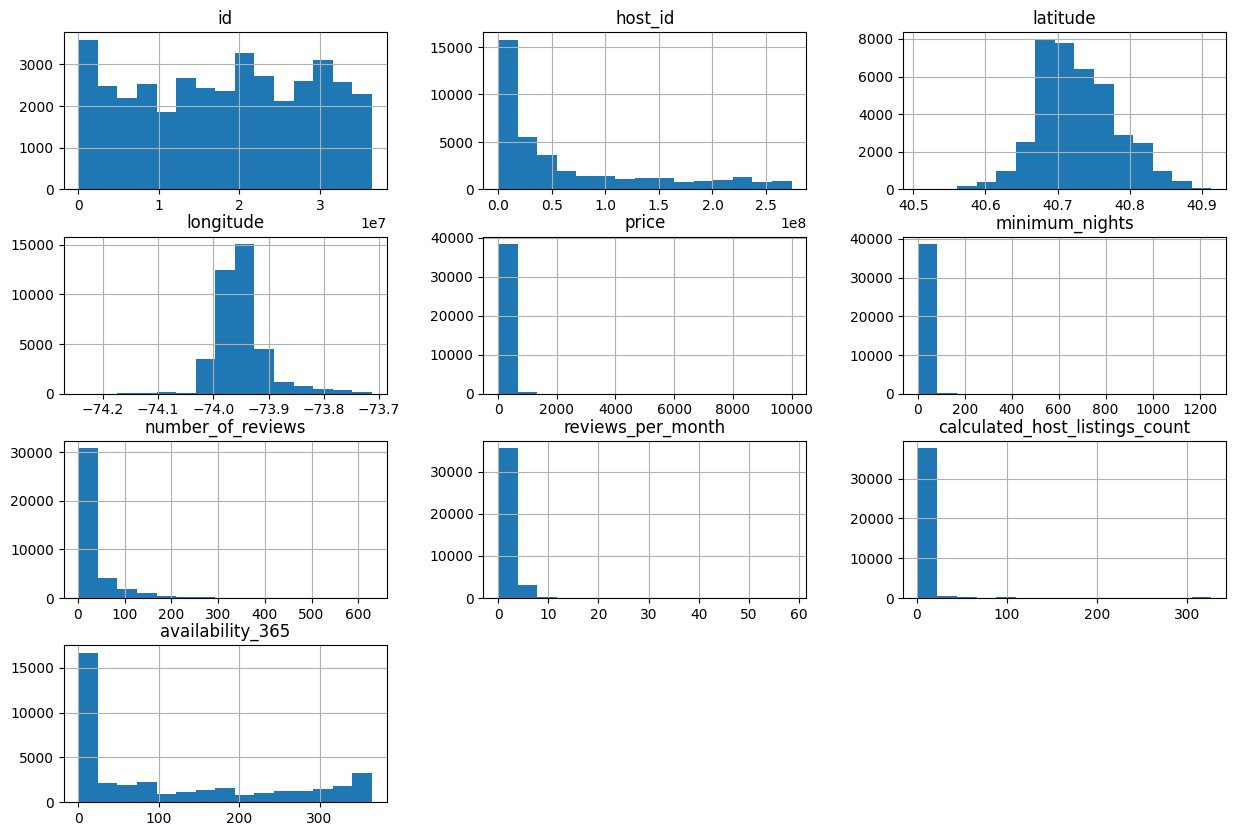

In [8]:
data.hist(bins=15, figsize=(15,10));


Looking at the histograms, we can notice that some important variables like price, reviews_per_month, calculated_host_listings_count and minimum_nights our poorly distributed. In order to better identify these problems, let's see more statistics about the dataset using the describe method.

In [9]:
data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We can notice that the maximum  price is 10,000 and the minimaum price is 0, which it makes absolutely no sense!.

# Removing Outliers
We'll plot boxplots for each of these columns so we can take a closer look at their distribution.

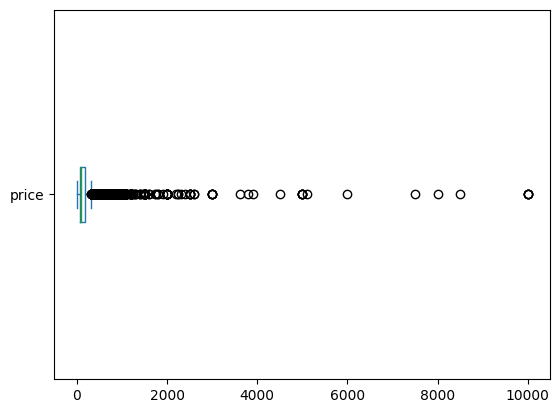

In [13]:
data['price'].plot(kind='box', vert=False)
plt.show()

In [44]:
df1 = data[data["price"] <= 400]
df = df1[df1["price"] != 0]
df["price"].describe()

count    37695.000000
mean       123.655816
std         75.188892
min         10.000000
25%         66.000000
50%        100.000000
75%        160.000000
max        400.000000
Name: price, dtype: float64

<Axes: >

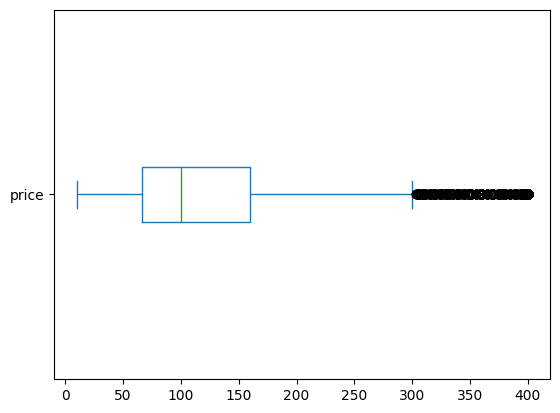

In [45]:
df["price"].plot(kind = "box", vert=False)

<Axes: >

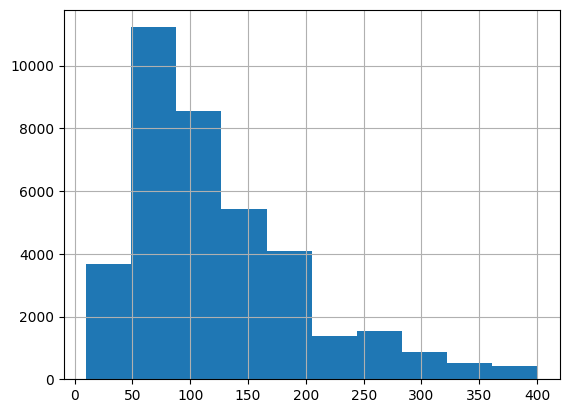

In [46]:
df["price"].hist(bins=10)

We can still see, for example, that the most common prices are still below U$100.00, but the distribution is much more realistic now.

# Correlations

Now let's see if there's any correlation between the numeric variables in the dataset.

We'll first create a correlation matrix using the corr method and then we will take advantage of the heat_map function from seaborn to visualize this matrix.

In [47]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.013953,-0.027906,0.114528,0.052635
minimum_nights,0.013953,1.000000,-0.070432,0.081344,0.103902
number_of_reviews,-0.027906,-0.070432,1.000000,-0.058950,0.200466
calculated_host_listings_count,0.114528,0.081344,-0.058950,1.000000,0.184747
availability_365,0.052635,0.103902,0.200466,0.184747,1.000000


Import seaboorn to visualize the correlation between variables.


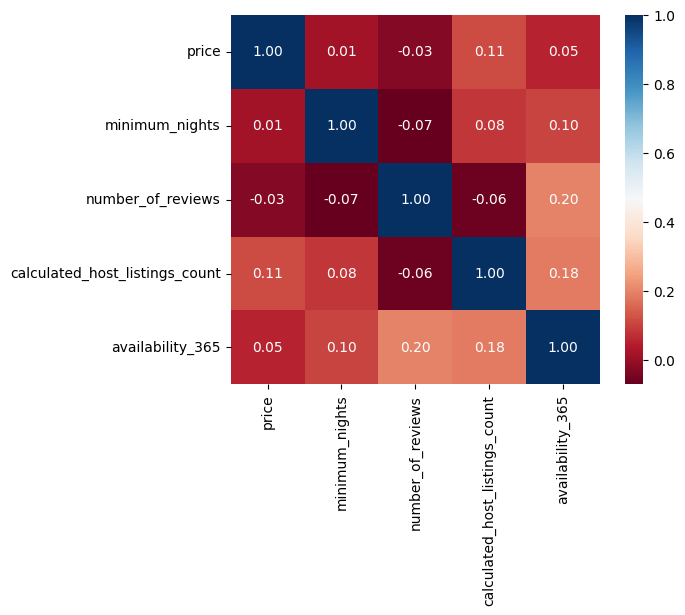

In [51]:
import seaborn as sns

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


As we can see, the variables do not seem to be significantly correlated to one another.





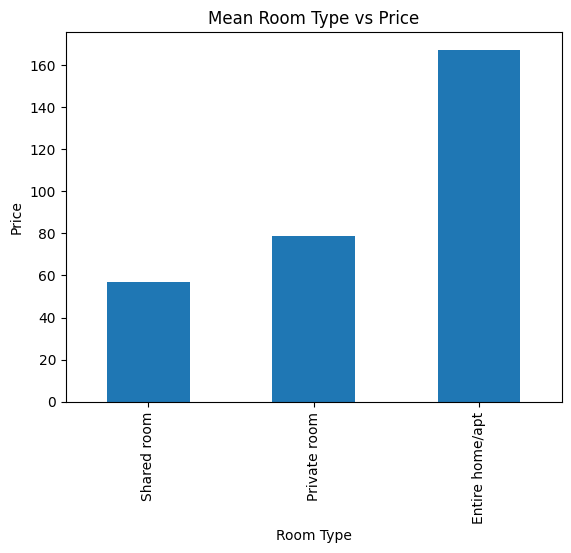

In [106]:
room_type_price = df.groupby("room_type")["price"].mean().sort_values(ascending=True)
room_type_price.plot( kind= "bar",
                    xlabel ="Room Type",
                    ylabel="Price",
                    title="Mean Room Type vs Price"
);

We can see hotel rooms and entire apartments are usually more expensive than private and shared rooms

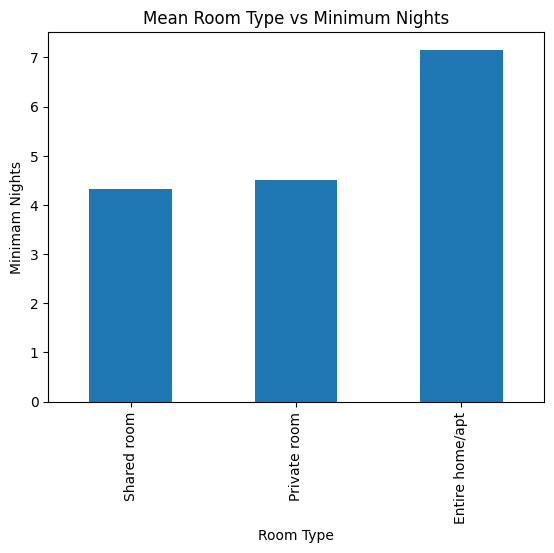

In [109]:
room_type_minnight = df.groupby("room_type")["minimum_nights"].mean().sort_values(ascending=True)
room_type_minnight.plot( kind= "bar",
                    xlabel ="Room Type",
                    ylabel="Minimam Nights",
                    title="Mean Room Type vs Minimum Nights"
);

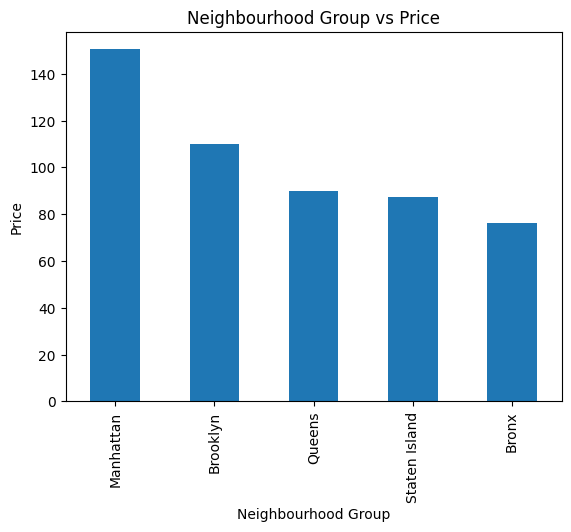

In [143]:
price_region = df.groupby('neighbourhood_group')["price"].mean().sort_values(ascending=False)
price_region.plot( kind= "bar",
                    xlabel ="Neighbourhood Group",
                    ylabel="Price",
                    title="Neighbourhood Group vs Price"
);

# Conclusion

With all that said, the conclusions are:

* Private rooms and entire apartments are the most common room types;
* Hotel rooms and entire apartments are usually more expensive than private and shared rooms;
* Most of the rooms are located in Manhattan and Brooklyn, which are also the most expensive regions;
* Yes, if you want to stay close to the major attractions of the city you'll probably expend more money.